## Capstone Project: Home Prices in Ames, Iowa

** Author: Jackie Zuker **

** March 2017 **

### Introduce the dataset

This dataset comes from the Ames, Iowa Assessor's office and includes various features of homes sold between 2006 and 2010 in that community.

The Ames Housing dataset is comprised of 2930 observations (1460 included in the training dataset) across 82 variables. There are 23 nominal variables, 23 ordinal variables, 14 discrete, and 20 continuous variables. 

The intention is to use this data set to answer the following questions:

1. Which features most strongly influence the sales price? (Ordinal/categorical, semi-categorical, and continuous)
2. What are the fundamental components of predicting home prices?  
3. Knowing nothing about the town of Ames, can one rank the most-desired to least-desired neighborhoods?

Before we dive into our statistical analysis, let's get oriented to our dataset. First we see a histogram of the distribution of sales prices of the homes in the dataset. 




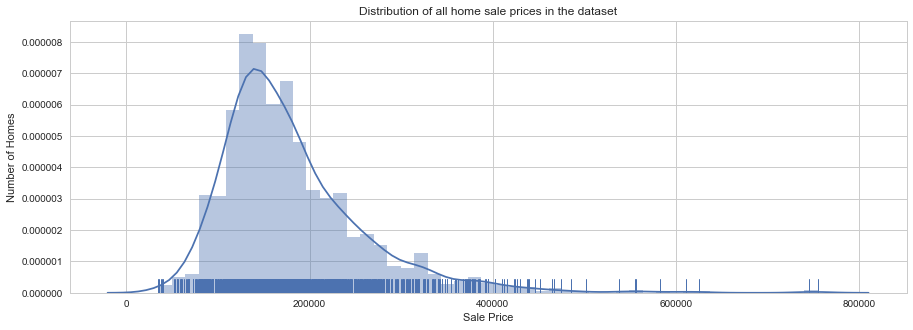

In [573]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

homePrices = pd.read_csv("/Users/jacquelynzuker/Desktop/Capstone/train.csv")
df = pd.DataFrame(homePrices)

%matplotlib inline

# Histogram of home prices
plt.figure(figsize=(15,5))
sns.distplot(df["SalePrice"], kde=True, rug=True);
#plt.hist(df["SalePrice"], bins=18)
plt.title("Distribution of all home sale prices in the dataset")
plt.xlabel("Sale Price")
plt.ylabel("Number of Homes")
plt.show()

Next we see the general breakdown in the dataset by volume of homes sold and by neighborhood. We can see that the NAmes and CollgCr neighborhoods had the greatest volume of homes sold during the 4-year period. We also see that there tends to be some overlap in Sales Price in most neighborhoods, although the NridgeHt and NoRidge homes have the highest median Sales prices as well as highest outliers. 

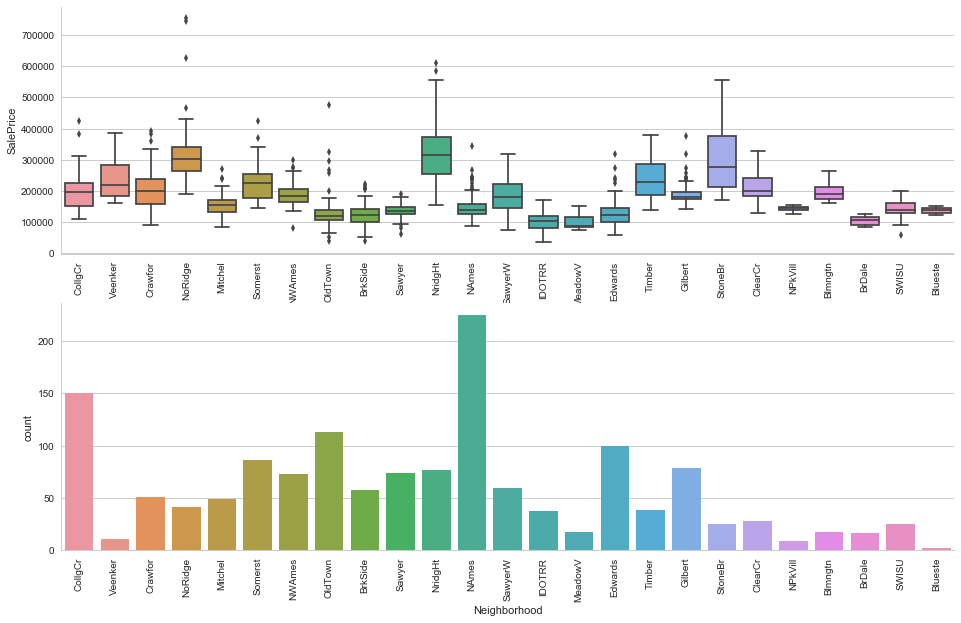

In [574]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(16,10))
sns.set_style("whitegrid")
sns.despine(left=False)

sns.boxplot("Neighborhood","SalePrice",data=homePrices, ax=ax1)
sns.countplot(x="Neighborhood", data=homePrices,ax=ax2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

# Investigate volume of homes per neighborhood

## Question \#1: Which features most strongly influence the sales price? (Ordinal/categorical, semi-categorical, and continuous)

Generally, there are several factors which might influence the sale price of a home, and these factors can be either external(national/state real estate trends, community development projects, mortgage markets, etc), or they can be internal (square footage of the home, number of bedrooms, condition of the home, etc). 

In this dataset, there are nominal variables (*Street (gravel/paved), Neighborhood*), ordinal variables (*Overall Quality, Garage Condition*), discrete variables(*Year Built, Number of Bathrooms*), and continuous variables (*Lot Area, Garage Area*). Each of these may be associated with the price with a positive, negative, or no correlation. Let's take a look at the relationships within each of these variable classes. 

#### Numerical features

Numerical features can be easily correlated to each other with a correlation matrix. This includes the ordinal, discrete and continuous variables. 





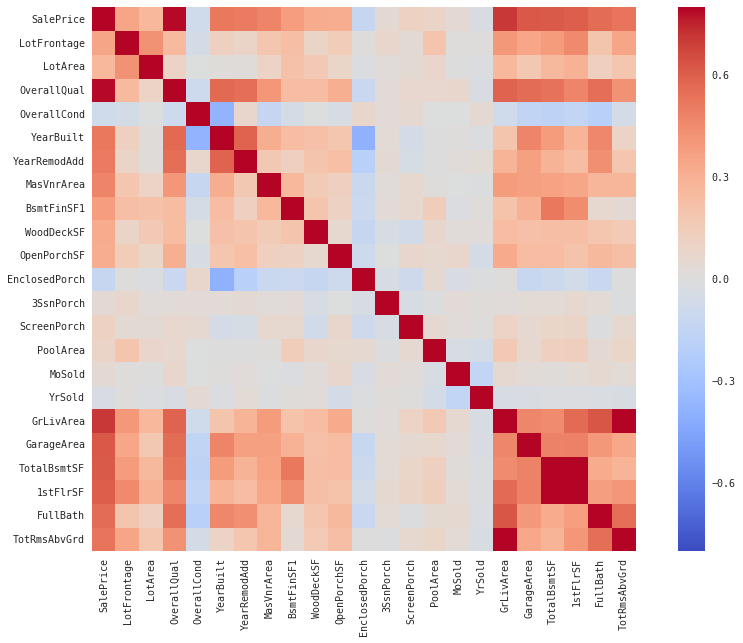

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", font="monospace")

# Correlation matrix of numerical features
corrmat=homePrices[["SalePrice", "LotFrontage", "LotArea", "OverallQual", "OverallCond","YearBuilt","YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "WoodDeckSF", "OpenPorchSF",
                  "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MoSold", "YrSold", "GrLivArea",
                  "GarageArea","TotalBsmtSF","1stFlrSF","FullBath", "TotRmsAbvGrd"]].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, cmap='coolwarm')
plt.show()


We see in the correlation plot above that some of the strongest positive correlations with Sales Price are "OverallQual", "GrLivArea", and "TotalBsmtSF". The "EnclosedPorch" variable has the strongest negative correlation with the Sale Price. Let's take a closer look at these variables. 

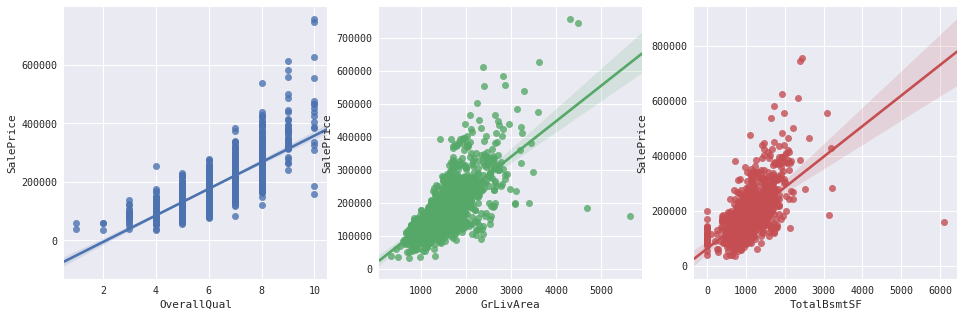

In [576]:
fig, axs = plt.subplots(ncols=3, figsize=(16,5))

sns.regplot(x='OverallQual', y='SalePrice', data=homePrices, ax=axs[0])
sns.regplot(x='GrLivArea', y='SalePrice', data=homePrices, ax=axs[1])
sns.regplot(x='TotalBsmtSF',y='SalePrice', data=homePrices, ax=axs[2])

plt.show()

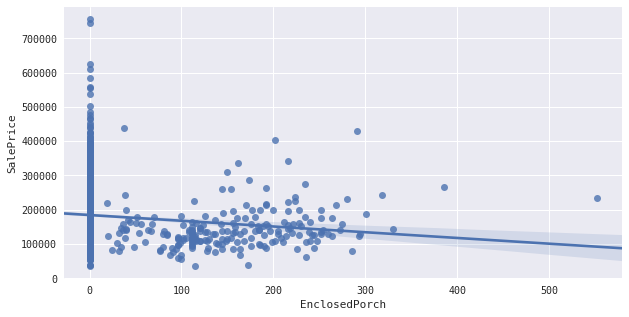

In [577]:
f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x='EnclosedPorch', y='SalePrice', data=homePrices)
plt.show()

We see strong positive linear relationships between Sales Price and Overall Quality, Above Ground Living Area, and Total Basement Square Footage. We see a week negative relationship between Sale Price and Area of Enclosed Porch. 

The Enclosed Porch variable is also somewhat negatively correlated with Year Built, as shown in the Correlation Plot. Thus, we may be seeing some relationship with older homes tending to have larger enclosed porches. There is also some heteroskedasticity involved, because many higher end homes do not have any enclosed porch space at all, as shown in the plot above. 

**What effect do categorical variables have on the Sale Price?**

Let's take a look. 

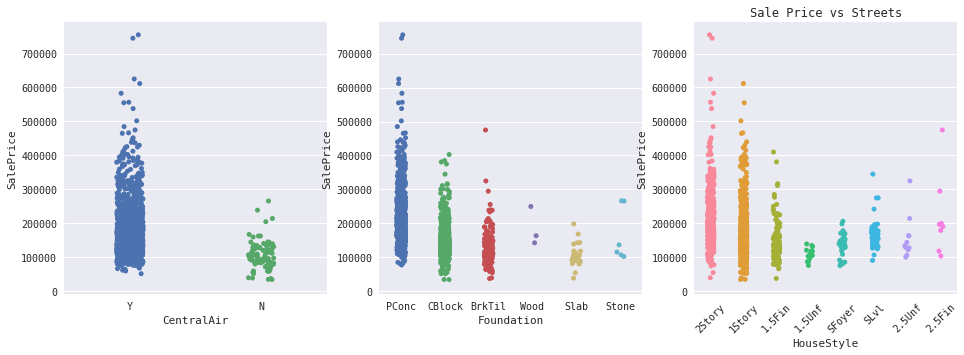

In [578]:
fig, axs = plt.subplots(ncols=3, figsize=(16,5))
plt.xticks(rotation=45)
sns.stripplot(x=homePrices["CentralAir"], y=homePrices["SalePrice"],jitter=True, ax=axs[0])
sns.stripplot(x=homePrices["Foundation"], y=homePrices["SalePrice"],jitter=True, ax=axs[1])
sns.stripplot(x=homePrices["HouseStyle"], y=homePrices["SalePrice"],jitter=True, ax=axs[2])

plt.title("Sale Price vs Streets");

It looks like there is some correlation with higher Sale Price and Central Air. Additionally, we see correlations with the Sale Price and various Foundation types, and various House Styles. 

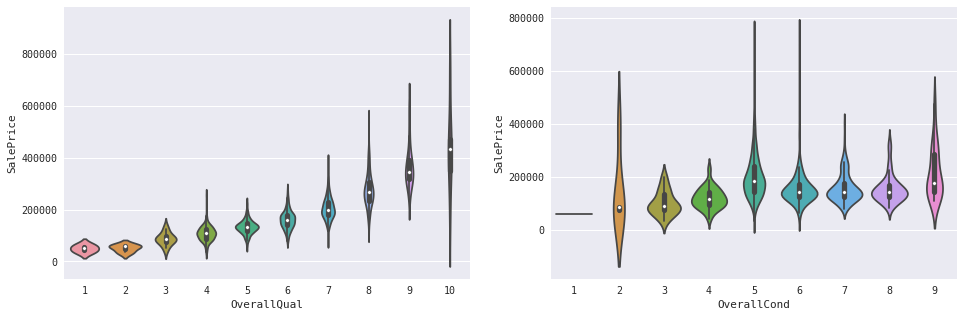

In [579]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))
sns.violinplot("OverallQual","SalePrice",data=homePrices, ax = axs[0])
sns.violinplot("OverallCond","SalePrice",data=homePrices, ax = axs[1])

sns.despine(trim=True)

As the Overall Quality score increases, there is a positive correlation with the Sale Price. Interestingly, we do not see as strong of a correlation in the Overall Condition variable. 


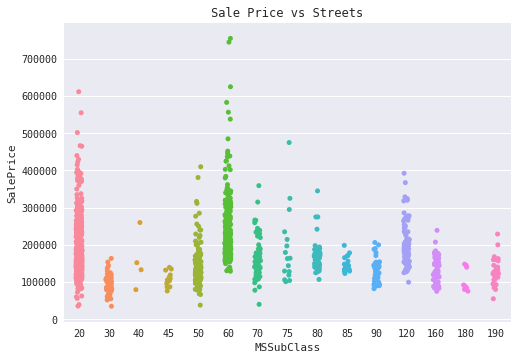

In [580]:
sns.stripplot(x=homePrices["MSSubClass"], y=homePrices["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");

MSSubClass is a nominal variable which uses a numerical code to identify the type of dwelling involved in the sale. The code is as follows: 

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
       
We see that the 1-story and 2-story homes aged 1946 and newer have both the highest volume represented in the dataset and the highest median sale prices. 

With so many dimensions in this data, it can be hard to deal with this level of complexity. We need to reduce the dimensionality of the dataset. This brings us to question 2: 


## Question 2: What are the fundamental components of predicting home prices? 

So we can compare numerical (ordinal, discrete, and continuous) variables, and we can inspect each of the categorical variables, however with 82 variables present in this dataset, several are likely to be dependent on other variables. We need to parse out the most important features. This calls for....


### Dimensionality Reduction 

**via Principle Components Analysis**

Principle Components Analysis utilizes linear combinations of the original variables such that the first principal component explains the largest variance between the variables, the second explains the next largest variance, etc. The principal components are uncorrelated to each other, and each successive component explains less and less variability. 

The first *eigenvalue* explains the largest amount of variance, the second explains the second largest, etc. 
As we reduce the dimensionality of the data, the goal is to capture the most variance in the fewest number of *eigenvalues*. This can be intuitively viewed in a scree plot. 

The first step is to clean the data. The following variables have more than 10% of the values missing or NaN. 

In [581]:
nans=pd.isnull(homePrices).sum()
nans[nans>(len(homePrices)*.1)]

LotFrontage     259
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

Remove the variables which are largely missing. Because there are so many values missing, it makes more sense to remove these fields from further analysis than to impute them with a median value.

In [582]:
homePrices = homePrices.drop("Alley", 1)
homePrices = homePrices.drop("FireplaceQu", 1)
homePrices = homePrices.drop("PoolQC", 1)
homePrices = homePrices.drop("Fence", 1)
homePrices = homePrices.drop("MiscFeature", 1)
homePrices = homePrices.drop("LotFrontage", 1)

Next let's investigate which NaN values remain, and how many there are in each category: 

In [583]:
nans=pd.isnull(homePrices).sum()
nans[nans>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

We see that the Garage variables are likely to be correlated to other Garage variables which do not have any missing values "GarageArea" and "GarageCars". Similarly, there are a number of Basement variables that do not have missing values, including BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, and BsmtHalfBath. If there are principal components of the sale price associated with the basement and garage variable, they are likely to be represented by the existing and complete variable columns. 

The Bsmt and Garage variables with relatively large numbers of incomplete data are removed. 

The MasVnrType, MasVnrArea, and Electrical NA's are replaced with median values for the discrete variable, and mode values for the categorical variables from the dataset.

Modes: 
MasVnrType : None
Electrical : SBrkr

Medians: 
MasVnrArea : 0

We see in the next few graphs the relative breakdown of volume of data in each category, and how each variable affects the overall sales price. The categories do not seem to have a strong correlation with sales price. 

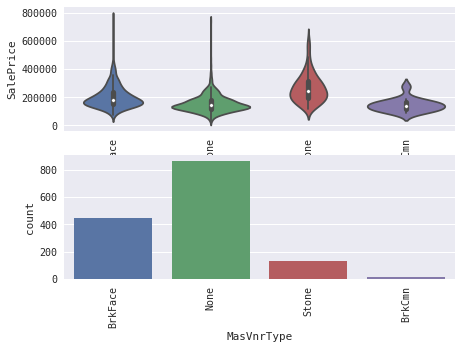

In [584]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(7,5))
sns.set_style("whitegrid")

sns.violinplot("MasVnrType","SalePrice",data=homePrices, ax = ax1)
sns.countplot(x="MasVnrType", data=homePrices,ax=ax2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

sns.despine(trim=True)

In [585]:
homePrices["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

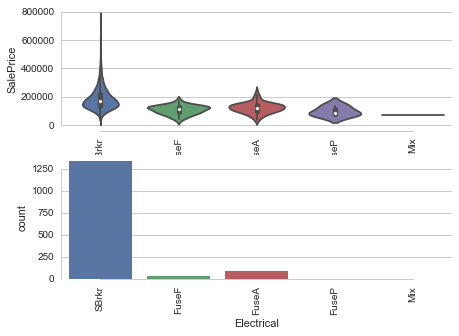

In [586]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(7,5))
sns.set_style("whitegrid")

sns.violinplot("Electrical","SalePrice",data=homePrices, ax = ax1)
sns.countplot(x="Electrical", data=homePrices,ax=ax2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
sns.despine(trim=True)

plt.show()

Missing Value Imputation:

In [587]:
# Drop bsmt and garage variables as discussed above
homePrices = homePrices.drop("GarageType", 1)
homePrices = homePrices.drop("GarageYrBlt", 1)
homePrices = homePrices.drop("GarageFinish", 1)
homePrices = homePrices.drop("GarageQual", 1)
homePrices = homePrices.drop("GarageCond", 1)
homePrices = homePrices.drop("BsmtQual", 1)
homePrices = homePrices.drop("BsmtCond", 1)
homePrices = homePrices.drop("BsmtExposure", 1)
homePrices = homePrices.drop("BsmtFinType1", 1)
homePrices = homePrices.drop("BsmtFinType2", 1)

In [588]:
# Replaces NAs in scalar fields with the mean value
homePrices = homePrices.fillna(homePrices.mean())

# Replaces NAs in categorical fields with the mode value
homePrices.loc[(homePrices["Electrical"].isnull()), "Electrical"] = 'SBrkr'
homePrices.loc[(homePrices["MasVnrType"].isnull()), "MasVnrType"] = 'None'

In [589]:
nans=pd.isnull(homePrices).sum()
nans[nans>0]

Series([], dtype: int64)

All missing values have been imputed. 

Now let's convert the categorical variables to numerical dummy variables so all variables can be used in Principal Components Analysis (PCA)

In [590]:
# Create a list of all categorical variables
categories_to_numeric = list()
for columns in homePrices.columns:
    if homePrices[columns].dtype == "O":
        categories_to_numeric.append(columns)
        
# Turn variable string values into integer values
homePrices_with_dummies = pd.get_dummies(data = homePrices)

# Let "SalesPrice" be it's own variable
label = homePrices_with_dummies["SalePrice"]
noSale = homePrices_with_dummies.drop("SalePrice",1)

# Log transform
logged_homePrices_with_dummies = np.log(noSale)
logged_label = np.log(label)

# Remove -infs in the dataset
logged_homePrices_with_dummies[logged_homePrices_with_dummies==-np.inf] = 0

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log


### PCA Analysis

In [591]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, whiten=True)
a = pca.fit(logged_homePrices_with_dummies)
variance = pd.DataFrame(pca.explained_variance_ratio_)
print(variance)

           0
0   0.220905
1   0.175604
2   0.121809
3   0.101698
4   0.071098
5   0.058375
6   0.051098
7   0.043511
8   0.032095
9   0.029936
10  0.025451
11  0.016502
12  0.009375
13  0.008698
14  0.007580
15  0.007140
16  0.004996
17  0.003982
18  0.003074
19  0.001944


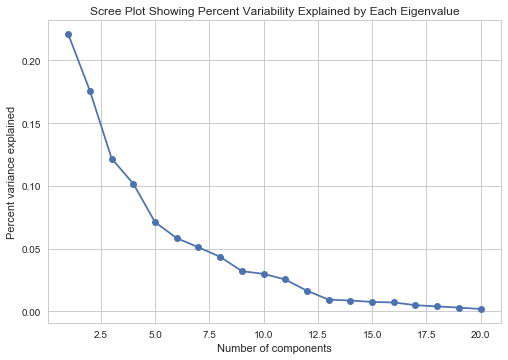

In [592]:
plt.figure(1, figsize=(9, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])

dat = range(1, 21)
plt.plot(dat, variance, marker='o')

plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Percent variance explained')
plt.title("Scree Plot Showing Percent Variability Explained by Each Eigenvalue")

plt.show()


We see that we can reduce the dimensionality of our dataset using Principal Component Analysis. The 82 variables included in the original dataset can be reduced to 7 components to explain variances up to 5%-22% of the Sales Price. Eleven principal components can explain variances of 1% and greater. 

### PCA Plot and Label Creation: 

During PCA Analysis, we assigned labels to the SalePrice vector. Let's visualize the stratification in the data separating upper quantile and lower quantile homes using a PCA plot. 


In [593]:
label.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let's explore what makes a home sell in the top quartile versus the bottom quartile. Class1 will include homes which sold for more than \$214k, and Class3 sold for \$129,975 or less. 



In [594]:
class1 = label[label>214000]
class3 = label[label<=129275]
print(len(class1))
print(len(class3))

362
357


In [595]:
# Transpose the class labels
class1T = class1.T
class3T = class3.T
transf.shape

(1460, 10)

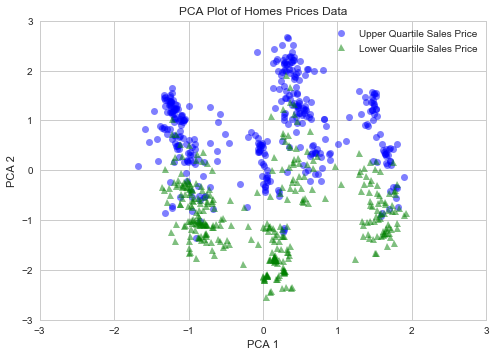

In [596]:
pca = PCA(n_components=10, whiten=True)
transf = pca.fit_transform(logged_homePrices_with_dummies)
transf_label = label.T

plt.plot(transf[class1T.index,0],transf[class1T.index,1], 'o', markersize=7, color='blue', alpha=0.5, label='Upper Quartile Sales Price')
plt.plot(transf[class3T.index,0],transf[class3T.index,1], '^', markersize=7, color='green', alpha=0.5, label='Lower Quartile Sales Price')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.title("PCA Plot of Homes Prices Data")

plt.show()

## Question 3: Knowing nothing about the town of Ames, can one rank the most-desired to least-desired neighborhoods?

In order to rank the most-desired to least-desired neighborhood, we must decide what attributes the "most-desired" neighborhoods would have. 

Generally, most-desired neighborhoods tend to have certain community attributes that are separate from individual home attributes. Some of these attributes might include a good school district, trendy restaurants, parks, etc. Given that we have no information about these attributes, how might the most-desired neighborhoods be reflected in our dataset?  

Generally, if a neighborhood is desired by a greater number of people, we would expect people would pay more for homes that are otherwise similar. The easy way to approach this problem is to simply rank neighborhoods via Sales Price. 


In [608]:
homePrices["PricePerSqFt"] = homePrices["SalePrice"]/homePrices["GrLivArea"]

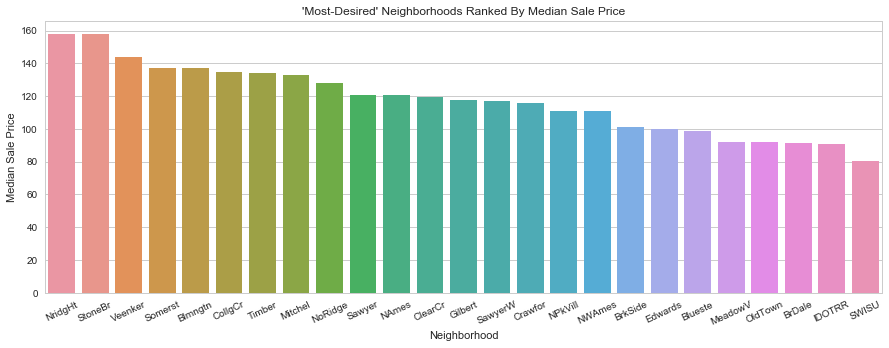

In [606]:
grouped = homePrices['PricePerSqFt'].groupby(df['Neighborhood']).median()
grouped = grouped.sort_values(ascending=False)
names = list(grouped.index)

plt.figure(figsize=(15,5))
neighborhoodMedians = list(grouped)

N = len(neighborhoodMedians)
ind = np.arange(N)
sns.barplot(ind, neighborhoodMedians)
plt.xlabel("Neighborhood")
plt.ylabel("Median Sale Price")
plt.title("\'Most-Desired\' Neighborhoods Ranked By Median Sale Price")
plt.xticks(ind, names, rotation="25")
plt.show()



However, there may be fundamental differences in the homes in a certain neighborhood driving the sale price other than the desirability of the neighborhood. An example of this would be a neighborhood full of very large homes on acreage versus a neighborhood of small homes. Additionally, certain neighborhood may simply enjoy a higher quality, another driving factor in sale price. Many neighborhoods are all built at the same time, so the homes in a neighborhood may have large differences in the Year Built. 

Let's compare neighborhoods using the selling price in price per square foot and incorporating differences in quality. 

In [631]:
homePrices["Price / (Overall Quality * Square Feet)"] = homePrices["PricePerSqFt"]/homePrices["OverallQual"]

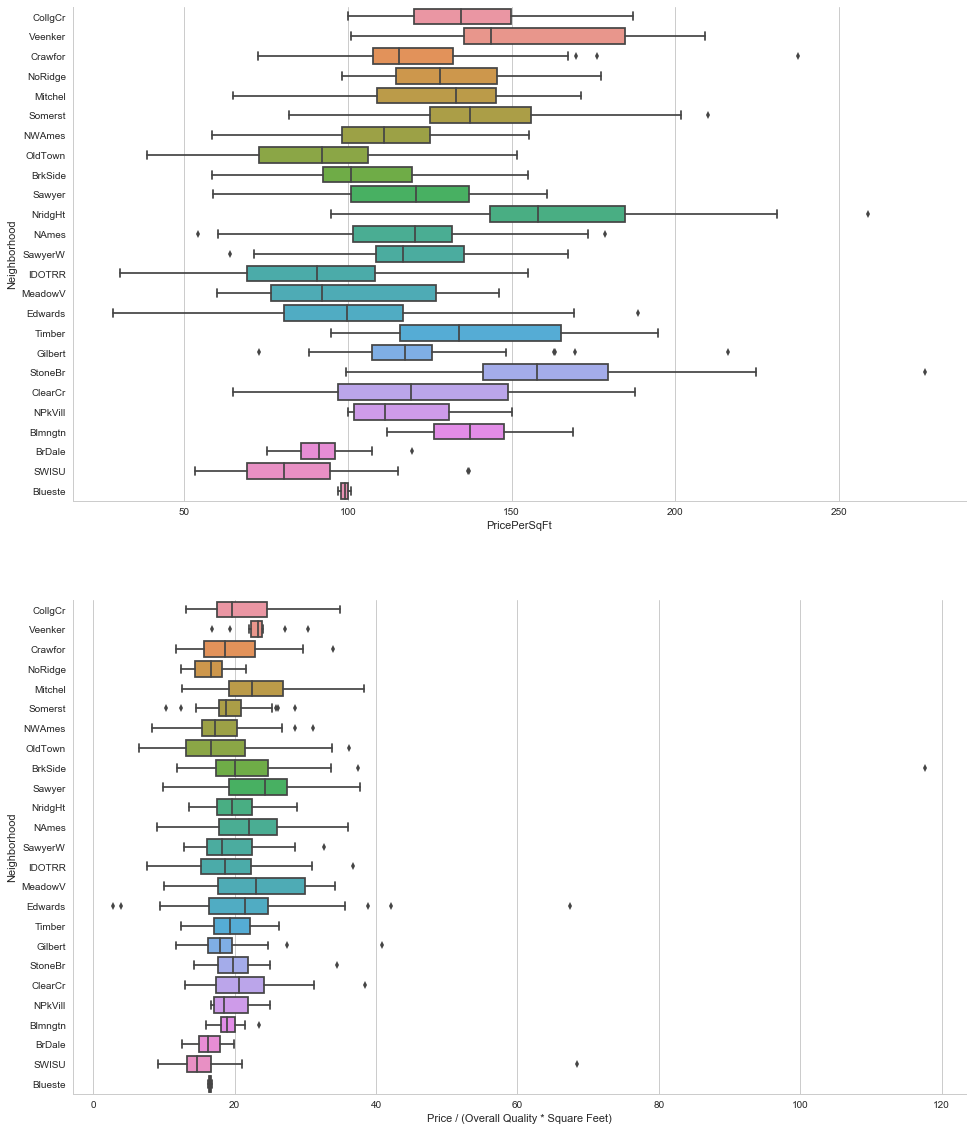

In [632]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(16,20))
sns.set_style("whitegrid")
sns.despine(left=False)

sns.boxplot("PricePerSqFt", "Neighborhood", data=homePrices, ax=ax1)
sns.boxplot("Price / (Overall Quality * Square Feet)", "Neighborhood", data=homePrices,ax=ax2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)

plt.show()


Here we see that NAmes and StoneBr enjoy the highest median sales prices in terms of Price Per Sq Foot. Does this necessarily mean that these are the most desired neighborhoods? **No!** We haven't controlled for the Overall Quality, and other potential driving factors. We need to use Multiple Regression Analysis for this task, which is on the syllabus for Thinkful's Data Science Bootcamp, so stay tuned! 

In the meantime, let's see if NAmes and StoneBr stay near the top of the list when we bin the data by overall quality. (Double click the graph to make full-size)

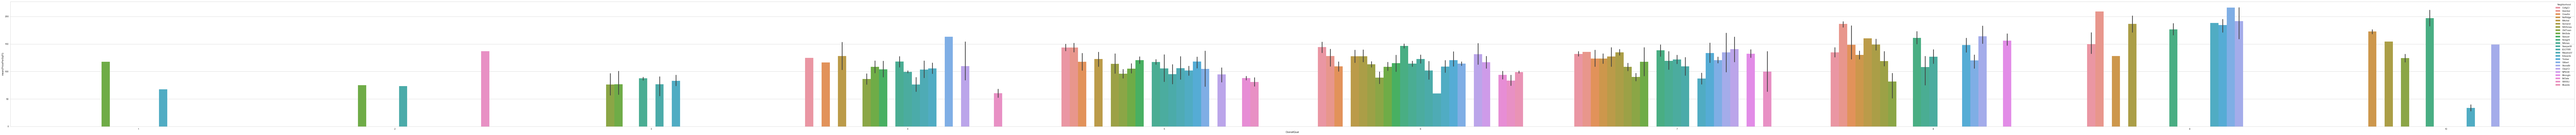

In [612]:
plt.figure(figsize=(200,10))
sns.barplot(x="OverallQual", y="PricePerSqFt", hue="Neighborhood", data=homePrices);

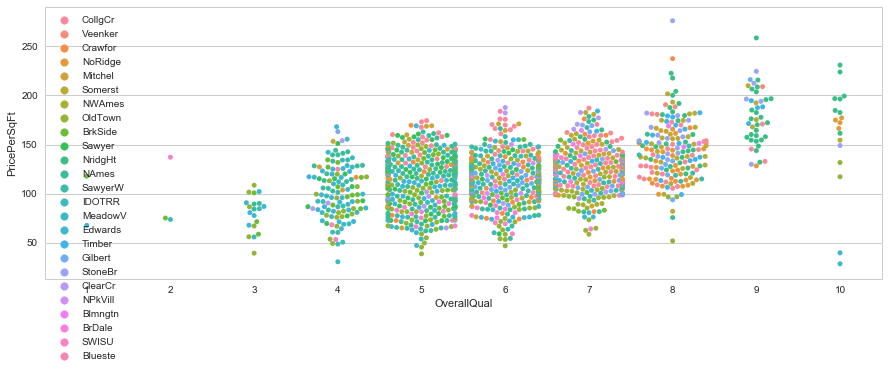

In [618]:
plt.figure(figsize=(15,5))
sns.swarmplot(x="OverallQual", y="PricePerSqFt", hue="Neighborhood", data=homePrices)
plt.legend()
plt.show()

When we bin by Overall Quality, the variation between neighborhoods becomes reduced. It seems that not all neighborhoods have homes with specific quality scores, however there is generally less variation in the sale price between neighborhoods once you have controlled for overall quality and square-footage of the home. 

We have a situation where the most-desired neighborhood is not making a huge difference on the sale price of the home. Each home-buyer has a unique set of attributes that make a home desirable for him or her. We expect there would be some overlap of these desires, but the data suggest that the largest driving force of the sale price within this town is actually attributes about the home itself. 

### Ideas for future research: 

With further research one could utilize a variety of skills (such as Multiple Regression Analysis, Principal Components Analysis, Least Squares Regression, and other topics covered in the Thinkful Data Science Bootcamp). USing these techniques, it may be possibilty to hone in on the smaller effects of the neighborhood desirability. 

Additionally, the could expand upon the applications of PCA. The eigenvectors found during principal component analysis may be able to elucidate questions about neighborhood desirability. 

In this exercise, only the training dataset was used. By building a multiple regression model and incorporating the test dataset, one could make predictions on the selling price of a home. 